In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from natsort import os_sorted
import json
import pickle
import pyabf
black_background = False # black background for slides
if black_background:
    plt.style.use('dark_background')
    
# Import shared_functions
import sys
import os
sys.path.insert(0, str(Path(os.getcwd()).parent))
import shared_functions

C:\Users\tadres\Miniconda3\envs\depol_block_publication\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#root_path = Path('G:\\My Drive\\PhD\\Odor quality discrimination\\ephys\\analysis')
root_path = Path('G:\\My Drive\\PhD\\Papers\\Vanishing spikes\\all_data\\ephys')
save_path = 'Describe Path'

Or1aUASOr42b_EtB_path = Path(root_path, 'Or1aUASOr42b EtB\\step stim')
conc_to_use_Or1aUASOr42b = ['EtB 1uM',
                            'EtB 100uM',
                            'EtB 10000uM']

# collect Or1a UAS-Or42b data

In [4]:
start_time = 23 # seconds after OB1 turned on
end_time = 25 # seconds after OB1 turned on

Or1aUASOr42b_EtB_mean_later, Or1aUASOr42b_EtB_odor_conc, \
    Or1aUASOr42b_EtB_std_later, Or1aUASOr42b_EtB_SEM_later = shared_functions.mean_spike_rate(
    Or1aUASOr42b_EtB_path,
    conc_to_use_Or1aUASOr42b,
    start_time, end_time)

230000
EtB 1uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or1aUASOr42b EtB\step stim\EtB 1uM\Or1aUASOr42b EtB_EtB 1uM.csv
EtB 100uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or1aUASOr42b EtB\step stim\EtB 100uM\Or1aUASOr42b EtB_EtB 100uM.csv
EtB 10000uM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or1aUASOr42b EtB\step stim\EtB 10000uM\Or1aUASOr42b EtB_EtB 10000uM.csv


# collect Or1aSF EtB data

In [5]:
Or1aSF_EtB_path = Path(root_path, 'Or1aSF EtB\\step stim')
conc_to_use_Or1aSF = ['EtB 1000nM',
                      'EtB 100000nM',
                      'EtB 10000000nM']

In [6]:
start_time = 23 # seconds after OB1 turned on
end_time = 25 # seconds after OB1 turned on

Or1aSF_EtB_mean_later, Or1aSF_EtB_odor_conc, \
    Or1aSF_EtB_std_later, Or1aSF_EtB_SEM_later = shared_functions.mean_spike_rate(
    Or1aSF_EtB_path,
    conc_to_use_Or1aSF,
    start_time, end_time)

230000
EtB 1000nM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or1aSF EtB\step stim\EtB 1000nM\Or1aSF EtB_EtB 1000nM.csv
EtB 100000nM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or1aSF EtB\step stim\EtB 100000nM\Or1aSF EtB_EtB 100000nM.csv
EtB 10000000nM
G:\My Drive\PhD\Papers\Vanishing spikes\all_data\ephys\Or1aSF EtB\step stim\EtB 10000000nM\Or1aSF EtB_EtB 10000000nM.csv


# plot both Or1a>UAS-Or42b and Or1aSF

<IPython.core.display.Javascript object>


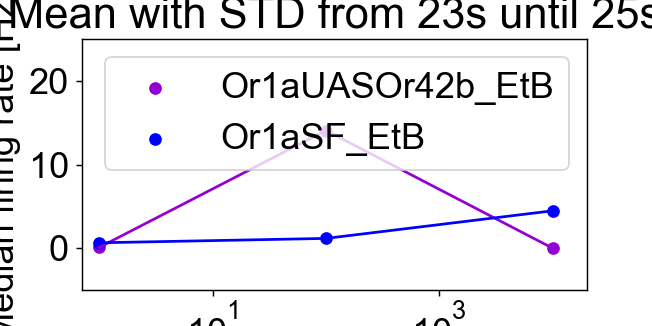

Text(0.5, 1.0, 'Mean with STD from 23s until 25s')

In [7]:
fig = plt.figure(figsize = (5,2.5))
ax = fig.add_subplot(111)

conc_Or1aUASOr42b_EtB_beg = []
for i in range(len(Or1aUASOr42b_EtB_odor_conc)):
    conc_Or1aUASOr42b_EtB_beg.append(float((Or1aUASOr42b_EtB_odor_conc[i]).split('uM')[0].split(' ')[-1])/1)
    if i == 0:
        ax.scatter(conc_Or1aUASOr42b_EtB_beg[i], Or1aUASOr42b_EtB_mean_later[i], color = 'darkviolet', label = 'Or1aUASOr42b_EtB')
    else:
        ax.scatter(conc_Or1aUASOr42b_EtB_beg[i], Or1aUASOr42b_EtB_mean_later[i], color = 'darkviolet')
ax.errorbar(conc_Or1aUASOr42b_EtB_beg, Or1aUASOr42b_EtB_mean_later, yerr=Or1aSF_EtB_SEM_later, color='darkviolet')


conc_Or1aSF_EtB_beg = []
for i in range(len(Or1aSF_EtB_odor_conc)):
    conc_Or1aSF_EtB_beg.append(float((Or1aSF_EtB_odor_conc[i]).split('nM')[0].split(' ')[-1])/1000)
    if i == 0:
        ax.scatter(conc_Or1aSF_EtB_beg[i], Or1aSF_EtB_mean_later[i], color = 'blue', label = 'Or1aSF_EtB')
    else:
        ax.scatter(conc_Or1aSF_EtB_beg[i], Or1aSF_EtB_mean_later[i], color = 'blue')
ax.errorbar(conc_Or1aSF_EtB_beg, Or1aSF_EtB_mean_later, yerr=Or1aSF_EtB_SEM_later, color='blue')

ax.set_xlim(0.7, 20000)
ax.set_ylim(-5,25)
 
ax.set_xscale('log')
ax.set_ylabel('Median firing rate [Hz]')
ax.set_xlabel('Concentration [uM]')
ax.legend()
ax.set_title('Mean with STD from ' + repr(start_time) + 's until ' + repr(end_time) +'s')
fig.savefig(Path(save_path, 'Fig3I_Or1aUASOr42b_and_Or1aSF_EtB_Dose_response_late_YHIGH.svg'))

# Or1a>UAS-Or42b, 10,000 uM

<IPython.core.display.Javascript object>


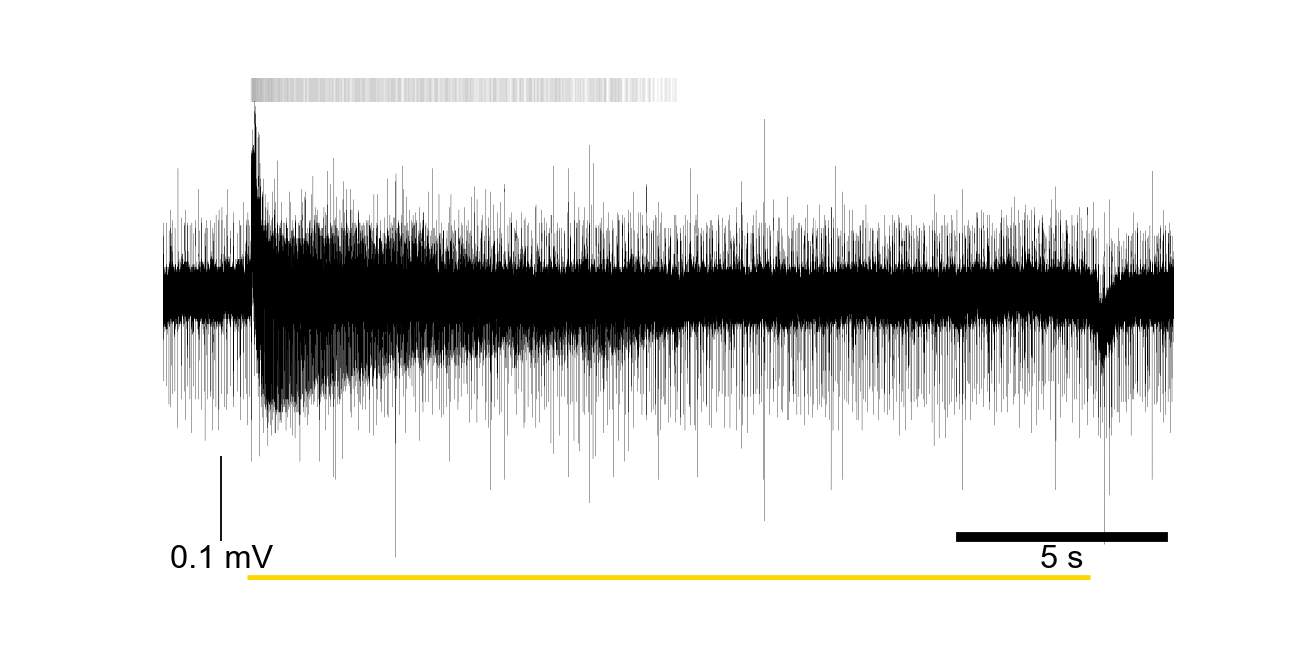

In [8]:
current_path = Path(root_path, 'Or1aUASOr42b EtB\\step stim\\EtB 10000uM\\20220208_21-19-53_pCh3_Ch2_EtB10mM_200mbar')

shared_functions.collect_and_plot_ephys_traces(current_path, 'Fig3I_Or1aUASOr42bSF_EtB10000uM_example.pdf', 
                                               save_path,  #ylim=(-0.3,0.5),
                                               rasterplot_linethickness=0.05,
                                               #detailed_x1 = (start_phasic_100uM, end_phasic_100uM), detailed_x1_color = 'navy',
                                               #detailed_x2 = (start_tonic_100uM, end_tonic_100uM), detailed_x2_color = 'cyan',,
                                                odor_color='gold'
                                              )